<a href="https://colab.research.google.com/github/taniahdez75/st/blob/main/Final%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tania Hernandez - Homework 3

Final Project.


1. Structural Analysis
- 1.1- Import Libraries
- 1.2 - Import Dataset
2- Quality Investigation
- Remove Duplicates.
- Treat nulls
- Treat missing values and outliers
3. Content Investigation
- Univariate Analysis. identify distribution of individual variables using histogram, box plot and kernel
I created a generic dataset with a real situation I have in my daily work

Situation will be in a healthcare company setting.
We have 2 datasets, 
 -- one with member general information
 -- one with medical cost

 General Info:
 -- Age, Gender, diabetes flag, dementia flag, num indicator of housing insecurity, food insecurity, transportation insecurity asn social vulnerability index, a flag if the member is enrolled in CM, date of enrollment

 Medical Cost:
  -- member_id, period of the cost, total_cost, and claim types


Redifined the objective to get which features are relevant to estimate the risk level of each member.

Step 2 - Divided Numeric Values from Categorical Values. Remove date.
Step 3- Scale numerics and create dummies for Categoricals

Importance:

A) with Random Forest Classifier: Relevant variables were TranspInsecurity, Hosuing Insecurity, Food Insecurity, Age, and SVI factor.

 member_id    0.160536
14      TranspIns    0.154162
11     HousingIns    0.144553
12        FoodIns    0.135384
8             age    0.128958
13      SVIFactor    0.125642
16           cost    0.040105
10       dementia    0.031722
15             CM    0.027712
9        diabetes    0.022168
1           sex_M    0.013402
0           sex_F    0.009671
5   claim_type_IP    0.001677
4   claim_type_ER    0.001557
6   claim_type_RX    0.001160
2      period_POS    0.000858
3      period_PRE    0.000731


B- with Permutations age and food insecurity were the less important.

C- with the  logistic regression method, shorter columns were Diabetes, dementia, age, claim_type are the ones with less importance


In a real situation I will remove a few columns with the less importance and rerun the model to compare results.

In [114]:
#Final Project
#1.1 Import Libraries
#Dataframe for CAse MAnangement Evaluation
import pandas as pd
import numpy as np
import requests

#Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#MAchine learning model
from sklearn .linear_model import LogisticRegression




In [115]:
#1.2 Import Dataset
#Creating Member Data

import numpy as np
import pandas as pd
import datetime

# Define the number of records
num_records = 1000

# Define member_id as a sequence of integers
member_id = list(range(1, num_records + 1))

# Define sex, age, diabetes and dementia as random variables
sex = np.random.choice(['M', 'F'], size=num_records)
age = np.random.normal(50, 10, size=num_records)
diabetes = np.random.choice([0, 1], size=num_records)
dementia = np.random.choice([0, 1], size=num_records)

#SDOH
HousingIns = np.random.uniform(low=1.0, high=10.0, size=num_records)
FoodIns = np.random.uniform(low=1.0, high=20.0, size=num_records)
SVIFactor = np.random.uniform(low=1.0, high=30.0, size=num_records)
TranspIns = np.random.uniform(low=1.0, high=40.0, size=num_records)

# Define case_management_date as a random date
start_date = '2019-01-01'
end_date = '2022-12-31'
case_management_date = pd.to_datetime(np.random.choice(pd.date_range(start=start_date, end=end_date), size=num_records))

# Define the CM flag column
CM = np.random.choice([0, 1], size=num_records)

# Define risk_level as a random variable
risk_level = np.random.choice(['High', 'Medium', 'Low', 'None'], size=num_records)

# Create a dataframe with the generated columns
data = {
    'member_id': member_id,
    'sex': sex,
    'age': age,
    'diabetes': diabetes,
    'dementia': dementia,
    'HousingIns':HousingIns,
    'FoodIns':FoodIns,
    'SVIFactor':SVIFactor,
    'TranspIns':TranspIns,
    'case_management_date': case_management_date,
    'CM': CM,
    'risk_level':risk_level
}

df = pd.DataFrame(data)

# Preview the dataframe
print(df.head())

   member_id sex        age  diabetes  dementia  HousingIns    FoodIns  \
0          1   F  49.306157         1         1    2.890671  17.687139   
1          2   F  45.553098         1         0    6.543669  16.710091   
2          3   M  35.263286         0         1    5.972113   9.181675   
3          4   F  49.612599         1         1    8.194021  18.962244   
4          5   M  43.371482         1         1    5.526389  16.160334   

   SVIFactor  TranspIns case_management_date  CM risk_level  
0  23.865255  27.793960           2019-07-05   0       High  
1  26.788690  39.331581           2022-01-22   1     Medium  
2   4.109752  35.899534           2021-06-08   0        Low  
3  24.997870  18.363617           2020-11-23   0       None  
4  26.740535  18.252988           2021-06-28   1     Medium  


In [116]:
# Creating Cost Data
#Define the number of records
num_records1 = 10000

# Get a random selection of values in df1 column A
values_A = np.random.choice(df['member_id'], size=num_records)

# Define cost_before_CM and cost_after_CM as random amounts of money
cost = np.random.normal(500, 100, size=num_records1)

# Define claim_type as a random variable
claim_type = np.random.choice(['ER', 'IP', 'RX'], size=num_records1)
period = np.random.choice(['PRE', 'POS'], size=num_records1)
  
# Create a dataframe with the generated columns
data = {
    'member_id':np.random.choice(values_A, size=num_records1),
    'period':period,
    'cost': cost,
    'claim_type': claim_type
}

df1 = pd.DataFrame(data)

# Preview the dataframe
print(df1.head())

   member_id period        cost claim_type
0        520    POS  605.261009         RX
1        599    PRE  534.890460         ER
2        486    PRE  621.511029         RX
3        521    POS  583.913521         ER
4        817    POS  533.186231         IP


In [117]:
# group by id, p, and ct and sum c
df2 = df1.groupby(['member_id', 'period', 'claim_type'], as_index=False)['cost'].sum()


In [118]:
# perform left join
df_left_join = pd.merge(df, df2, on='member_id', how='left')

# print result
print(df_left_join)

      member_id sex        age  diabetes  dementia  HousingIns    FoodIns  \
0             1   F  49.306157         1         1    2.890671  17.687139   
1             1   F  49.306157         1         1    2.890671  17.687139   
2             1   F  49.306157         1         1    2.890671  17.687139   
3             1   F  49.306157         1         1    2.890671  17.687139   
4             1   F  49.306157         1         1    2.890671  17.687139   
...         ...  ..        ...       ...       ...         ...        ...   
3754        999   F  57.675621         1         1    3.222225  17.456455   
3755        999   F  57.675621         1         1    3.222225  17.456455   
3756        999   F  57.675621         1         1    3.222225  17.456455   
3757        999   F  57.675621         1         1    3.222225  17.456455   
3758       1000   M  63.922460         0         1    4.368609  19.478240   

      SVIFactor  TranspIns case_management_date  CM risk_level period  \
0 

In [119]:
df_left_join.sample(5)

,member_id,sex,age,diabetes,dementia,HousingIns,FoodIns,SVIFactor,TranspIns,case_management_date,CM,risk_level,period,claim_type,cost
498,128,F,53.567083,1,1,1.408446,3.305185,4.400461,32.067496,2022-01-19,0,High,POS,IP,2509.807863
1552,412,F,44.801645,1,1,5.178051,12.995412,5.571798,32.575223,2020-05-23,1,None,PRE,RX,945.121199
3429,916,F,62.187859,0,1,7.925770,12.137384,26.369832,23.899559,2021-09-01,0,None,PRE,ER,2029.451906
1851,504,M,70.895658,0,0,6.741739,19.366789,5.250008,37.701698,2022-02-20,1,Low,POS,RX,2432.280927
1971,537,F,35.815496,1,1,4.595384,10.088682,12.557089,6.141504,2020-03-18,0,High,NaN,NaN,NaN


In [120]:
df_left_join.isnull().sum()


member_id                 0
sex                       0
age                       0
diabetes                  0
dementia                  0
HousingIns                0
FoodIns                   0
SVIFactor                 0
TranspIns                 0
case_management_date      0
CM                        0
risk_level                0
period                  361
claim_type              361
cost                    361
dtype: int64

In [121]:

# 2 -Quality Investigation
df=df_left_join
df = df.dropna(subset=['period'])
df.sample(5)

,member_id,sex,age,diabetes,dementia,HousingIns,FoodIns,SVIFactor,TranspIns,case_management_date,CM,risk_level,period,claim_type,cost
3573,951,F,72.372677,1,0,1.009131,16.737615,21.629734,30.847804,2021-03-21,1,Low,PRE,RX,3279.023135
842,219,M,35.282256,0,0,9.045051,4.279252,9.238997,10.731159,2021-07-14,0,Low,POS,RX,1115.622012
2426,652,F,49.883502,1,0,6.119098,12.429655,20.730249,25.872169,2020-11-02,0,None,PRE,IP,420.992178
3064,825,M,54.279029,1,1,8.667848,3.915881,22.832488,8.242655,2020-09-16,1,Low,PRE,RX,543.676021
3596,956,M,45.842316,1,1,2.057686,6.184445,15.255291,33.772337,2019-05-24,0,None,PRE,RX,2311.703953


In [122]:
df=df.drop('case_management_date',axis=1)

In [123]:
df.isnull().sum()

member_id     0
sex           0
age           0
diabetes      0
dementia      0
HousingIns    0
FoodIns       0
SVIFactor     0
TranspIns     0
CM            0
risk_level    0
period        0
claim_type    0
cost          0
dtype: int64

In [124]:
# Chek for duplicates
df.nunique()

member_id      639
sex              2
age            639
diabetes         2
dementia         2
HousingIns     639
FoodIns        639
SVIFactor      639
TranspIns      639
CM               2
risk_level       4
period           2
claim_type       3
cost          3398
dtype: int64

In [125]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()

In [126]:
df.dtypes

member_id       int64
sex            object
age           float64
diabetes        int64
dementia        int64
HousingIns    float64
FoodIns       float64
SVIFactor     float64
TranspIns     float64
CM              int64
risk_level     object
period         object
claim_type     object
cost          float64
dtype: object

In [127]:
numerics=['int64','float64']
catDF= df.select_dtypes(exclude=numerics)
numDF= df.select_dtypes(include=numerics)

In [128]:
catDF.head()

,sex,risk_level,period,claim_type
0,F,High,POS,ER
1,F,High,POS,IP
2,F,High,POS,RX
3,F,High,PRE,ER
4,F,High,PRE,IP


In [129]:
#Scale all numeric column
#numeric_cols = df.select_dtypes(include=['int', 'float']).columns
numDF = pd.DataFrame(scaler.fit_transform(numDF.values),columns=numDF.columns,index=numDF.index)
#scaled_df = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols, index=df.index)
numDF.head()

,member_id,age,diabetes,dementia,HousingIns,FoodIns,SVIFactor,TranspIns,CM,cost
0,-0.975379,-0.047567,1.0,0.0,-0.55244,0.758955,0.568341,0.331407,-1.0,-0.093112
1,-0.975379,-0.047567,1.0,0.0,-0.55244,0.758955,0.568341,0.331407,-1.0,0.607254
2,-0.975379,-0.047567,1.0,0.0,-0.55244,0.758955,0.568341,0.331407,-1.0,-0.238331
3,-0.975379,-0.047567,1.0,0.0,-0.55244,0.758955,0.568341,0.331407,-1.0,-0.020368
4,-0.975379,-0.047567,1.0,0.0,-0.55244,0.758955,0.568341,0.331407,-1.0,0.001141


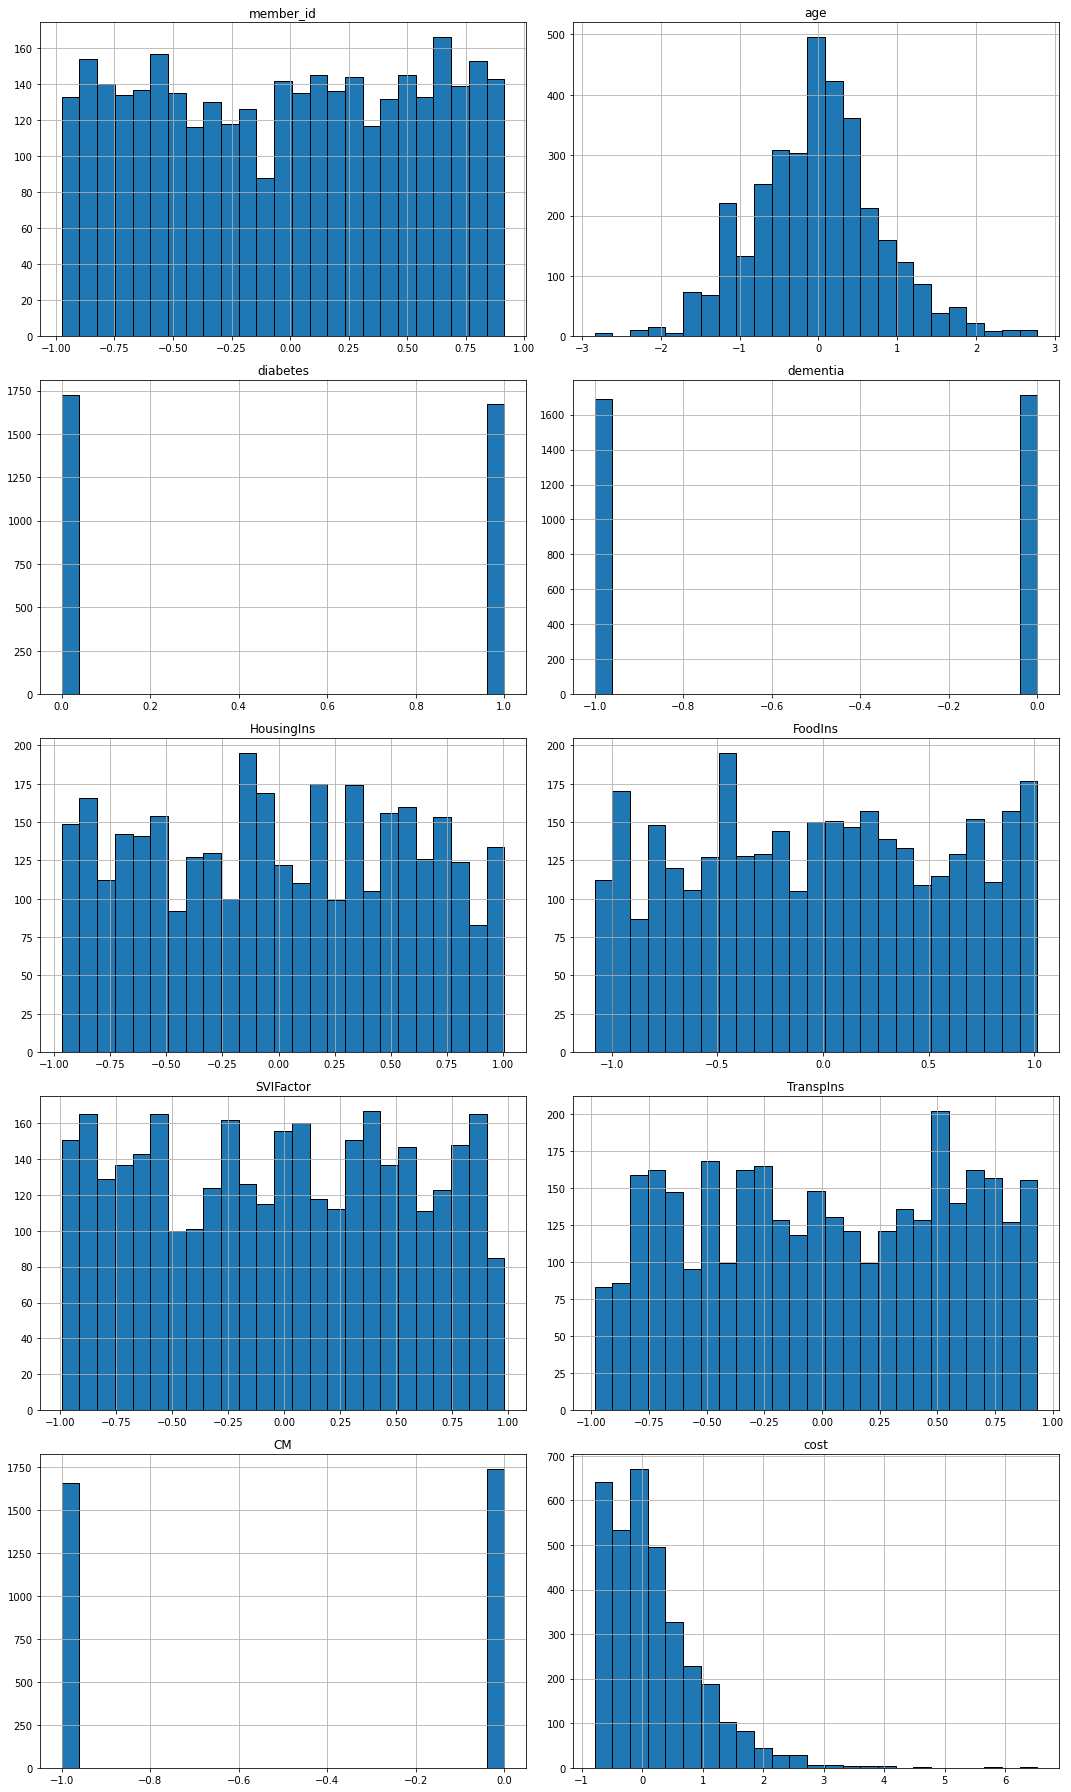

In [130]:
#Feature Distribution
numDF.hist(bins=25, figsize=(15, 25), layout=(-1, 2), edgecolor="black")
plt.tight_layout()
plt.show()

In [131]:
catDF.drop(['risk_level'],axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [132]:
catDF.head()

,sex,period,claim_type
0,F,POS,ER
1,F,POS,IP
2,F,POS,RX
3,F,PRE,ER
4,F,PRE,IP


In [133]:
catDF=pd.get_dummies(catDF)

In [134]:
catDF.head()

,sex_F,sex_M,period_POS,period_PRE,claim_type_ER,claim_type_IP,claim_type_RX
0,1,0,1,0,1,0,0
1,1,0,1,0,0,1,0
2,1,0,1,0,0,0,1
3,1,0,0,1,1,0,0
4,1,0,0,1,0,1,0


In [135]:
#MErge

X=pd.concat([catDF,numDF], axis=1)
print(X.shape)
#Prepare Y
Y=df['risk_level']

(3398, 17)


In [136]:
Y=Y.replace(to_replace=['High','Medium','Low','None'],value=[0,1,2,3])
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: risk_level, dtype: int64

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=100,stratify=Y)


In [138]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=5, random_state=43, n_estimators=300).fit(X_train, y_train)
rf.feature_importances_
feature_importances=pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})

#sort
feature_importances = feature_importances.sort_values('importance', ascending=False)

print(feature_importances)

          feature  importance
14      TranspIns    0.165654
13      SVIFactor    0.150092
12        FoodIns    0.141556
11     HousingIns    0.129293
7       member_id    0.125485
8             age    0.110259
0           sex_F    0.033958
9        diabetes    0.031866
1           sex_M    0.031020
16           cost    0.029322
10       dementia    0.028956
15             CM    0.016897
5   claim_type_IP    0.001380
6   claim_type_RX    0.001188
4   claim_type_ER    0.001054
3      period_PRE    0.001048
2      period_POS    0.000971


In [139]:
#Permutation

from sklearn.inspection import permutation_importance
r = permutation_importance(rf,X_test, y_test,
                         n_repeats=10,
                         random_state=0)
perm=pd.DataFrame(columns=['AVG_Importance','STD_Importance'],index=[i for i in X_train.columns])
perm['AVG_Importance']=r.importances_mean

In [140]:
print(perm.to_string())

               AVG_Importance STD_Importance
sex_F                0.040882            NaN
sex_M                0.031863            NaN
period_POS          -0.001471            NaN
period_PRE          -0.001373            NaN
claim_type_ER       -0.001275            NaN
claim_type_IP       -0.002255            NaN
claim_type_RX       -0.000098            NaN
member_id            0.093824            NaN
age                  0.074118            NaN
diabetes             0.017941            NaN
dementia             0.039510            NaN
HousingIns           0.087647            NaN
FoodIns              0.096863            NaN
SVIFactor            0.101765            NaN
TranspIns            0.121569            NaN
CM                   0.026078            NaN
cost                -0.000294            NaN


In [141]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(X,Y)

KNeighborsClassifier()

In [142]:
results=permutation_importance(kn,X_test,y_test,n_repeats=10,random_state=0)

Feature: 0 - Score: sex_F
Feature: 1 - Score: sex_M
Feature: 2 - Score: period_POS
Feature: 3 - Score: period_PRE
Feature: 4 - Score: claim_type_ER
Feature: 5 - Score: claim_type_IP
Feature: 6 - Score: claim_type_RX
Feature: 7 - Score: member_id
Feature: 8 - Score: age
Feature: 9 - Score: diabetes
Feature: 10 - Score: dementia
Feature: 11 - Score: HousingIns
Feature: 12 - Score: FoodIns
Feature: 13 - Score: SVIFactor
Feature: 14 - Score: TranspIns
Feature: 15 - Score: CM
Feature: 16 - Score: cost


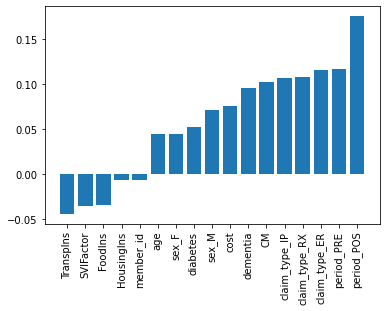

In [143]:
from matplotlib import pyplot
#imp
importance=feature_importances['importance']
importance=results.importances_mean
importance=np.sort(importance)

#get feat names
feature_names = feature_importances['feature']

#sum
for i, v in enumerate(importance):
    print('Feature: {} - Score: {}'.format(i, feature_names[i], v))

#plot
pyplot.bar([x for x in range(len(importance))],importance)
pyplot.xticks(range(len(importance)),feature_names, rotation=90)
pyplot.show()

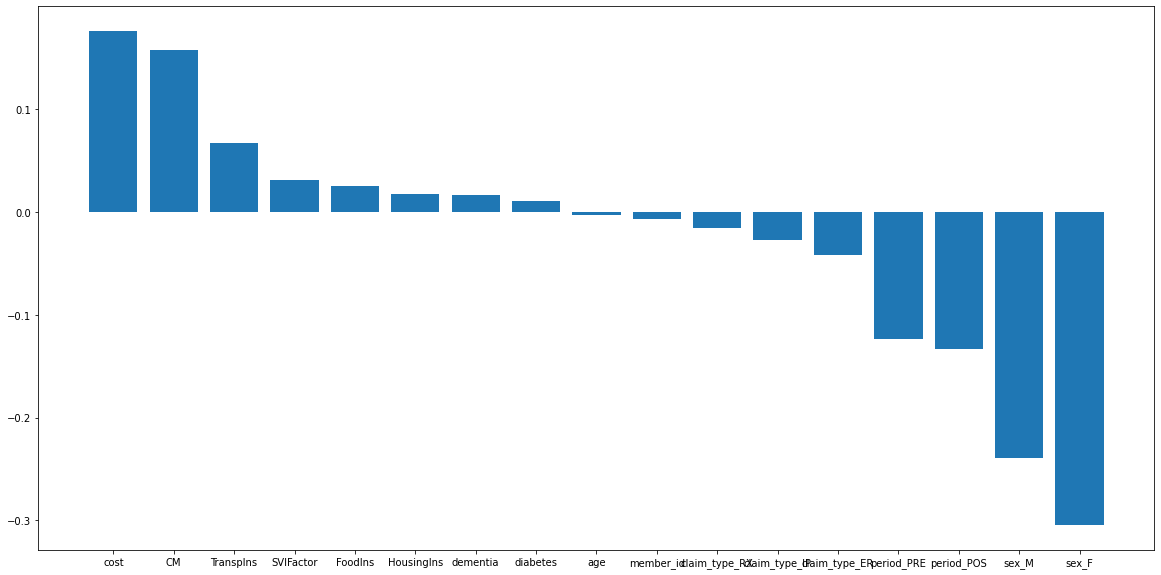

In [144]:
#Coefficients

model=LogisticRegression()
model.fit (X,Y)
importance= model.coef_[0]
importance=np.sort(importance)
importance
importance=pd.DataFrame({'feature':X.columns, 'importance': importance})
importance=importance.sort_values('importance',ascending=False)

#chart
plt.figure(figsize=(20,10))
plt.bar(importance['feature'], importance['importance'])
plt.show()

#for logistic regression this are the values that are considered important. We propably will remove the shorter columns for the model and compare results.
#Diabetes, dementia, age, claim_type are the ones with less importance